Step 1 : Importing Dependencies (Functions & Libraries)


In [8]:
import numpy as np
import pandas as pd   #pandas dataframe; to process data
import matplotlib.pyplot as plt
import seaborn as sns   #plots
from sklearn.model_selection import train_test_split   #for splitting the data  into training and test data
from sklearn.ensemble import RandomForestClassifier   #random forest is an ensemble model. (Decision Tree Ensemble model)
from sklearn.metrics import accuracy_score #accuracy score to show how well our model performs
import warnings
warnings.filterwarnings('ignore')

Step 2 : Data Collection

In [9]:
#loading dataset (Winequality to pandas dataframe)
wine_dataset =pd.read_csv('/content/winequality-red.csv') #read_csv reads the csv file and loads it into a dataframe

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#checking no. of rows and columns in dataset
wine_dataset.shape

(1599, 12)

In [12]:
#showing the first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#checking for any missing values in dataset. If any missing values are present, we delete the entire row of the dataset or take the mean of the values in that particular column
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Step 3 : Data Analysis and Visualization

In [14]:
#getting statistical measures of the dataset
wine_dataset.describe()   #describe() gets the count,SD,mean,percentile values etc. of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# checking number of wines we have in the dataset for each quality of wine
sns.catplot(data = wine_dataset, x='quality',  kind = 'count')  # plots the quality vs count from dataset

Step 3 (a) : Some More Data Analysis To Get Inferences From The Dataset


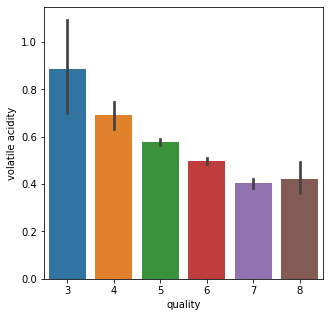

In [15]:
#some more data analysis 
# doing volatile acidity vs quality data analysis
plot = plt.figure(figsize=(5,5))
sns.barplot(data = wine_dataset, x='quality', y='volatile acidity')     #Inference : Vol. Acidity around 0.4-0.6 is ideal for high quality red wine. High Vol. acidity results in poor wine.

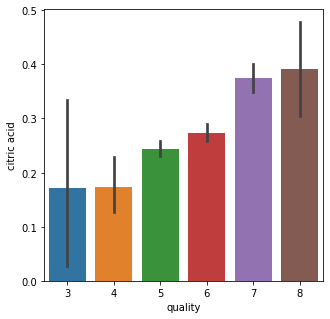

In [16]:
#some more data analysis 
# doing citric acid vs quality data analysis
plot = plt.figure(figsize=(5,5))
sns.barplot(data = wine_dataset, x='quality', y='citric acid') #Inference : Greater the Citric acid content, greater the quality of wine.

Step 3 (b) :  Correlation Matrix B/W all the input parameter to the Quality Parameter.

Two Types Of Corrleation:
1. Positive Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction
2. Negative Correlation - A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other.

In [17]:
correlation= wine_dataset.corr()

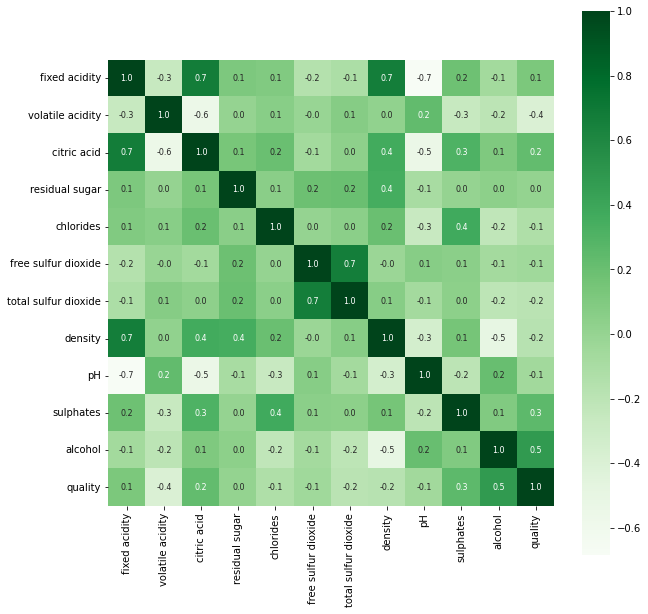

In [18]:
#Constructing a heatmap to understand the correlation b/w different features.
plt.figure(figsize=(10,10))  #10,10 for a large graph
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap = 'Greens')

#Explaining different parameters above :
#Correlation : For the heatmap , the correlation data declared above is used.
#cbar : Right most bar is ColorBar
#square : for the display shape to be square
# fmt : upto how many floating point values needed
# annot : Left Most Labels are annotations (annot)
# annot_kws : size of the annotations
# cmap : color maps of the squares to be in which color

Step 4 : Data Preprocessing

In [19]:
# separating data and labels. ie. quality is being fed into the model and is called the 'label'. the other input  parameters are reffered to as data.
X = wine_dataset.drop('quality', axis=1)  # dropping a column so use axis=1 else if we are dropping a row use  axis=0. 

#Use 'Print(X)' to view

Step 4 (a) : Label Binarization (ie. Quality Binarization)

We have seen we have 6 quality values.(3,4,5,6,7,8).

So we are going to categorize these 6 into two categories. 'Good' & 'Bad'.

Good - 7 & Above quality
Bad -  6 & Below 

We are using 0 for 'Bad' and 1 for 'Good'. So replacing all 3,4,5,6 to 0 
                                                        and 7,8     to 1

In [20]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)   #lambda function used to replace quality dataset with >=7 with 1 and else 0. 

#Use 'Print(Y)' to view

Step 5 : Splitting the dataset into Train & Test Data


In [21]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2, random_state=2)   # we imported sklearn.modelselection as train_test_split

# created 4 variables --> X_train, X_test, Y_train, Y_test
# X is spltted into X train and X test data.
# Y  is the label (quality values 0 & 1) ---  Labels For the X train data will be stored in Y Train & Labels for the X test data will be stored in Y test.
# test_size is the amount of data taken for testing. Here 0.2 represents 20% of the original dataset will be used for testing. Rest 80% will be used for training. 
#random_state is used for reproducing the exact split of the dataset as is in this code. We have used '2' here so any code with random_state  2 will have the exact split of the dataset.

#Use print(Y.shape, Y_train.shape, Y_test.shape) to see exact split.


Step 6 : Training The Model : Using Random Forest Classifier. 

Random Forest Classifier is a multiple decision tree model. More the number of Decision trees more accurate will be the prediction.


In [22]:
model  = RandomForestClassifier()    #we had imported random forest classifier.

In [23]:
model.fit(X_train, Y_train)   #X_train contains the data, Y_train contains the label (quality values).

RandomForestClassifier()

Step 7 : Model Evaluation

In [24]:
# Accuracy on Test data
X_test_prediction = model.predict(X_test)  #predicts the label values(quality) for X_test
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)  #comparing orignal labels (Y_test) with predicted labels (X_test_prediction)

print('Accuracy : ', test_data_accuracy)    #Any accuracy over 80 (>0.80) is a very good model.

Accuracy :  0.91875


Step 8 : Building a Predictive System

Testing the model using random set of data.

In [25]:
#remove the hash and use either the data for good or bad quality wine

#input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)   #data for a good quality wine--quality:7

input_data =(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)     #data for a bad quality wine--quality:5

input_data_as_array = np.asarray(input_data)              #changing the input data to a numpy array
input_data_reshaped = input_data_as_array.reshape(1,-1)   # reshape the data as we are predicting for only  one instance

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[0]
Bad Quality Wine
